In [1]:
from datetime import datetime, date
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


In [2]:
df = pd.read_csv('weather.csv')

df


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df = pd.read_csv('weather.csv').dropna(subset=['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']).reset_index(drop=True)

date = {value: datetime.strptime(value, '%Y-%m-%d').timetuple().tm_yday for value in df['Date'].unique()}
location = {value: index for index, value in enumerate(df['Location'].unique())}
wind_direction_max = {value: index for index, value in enumerate(df['WindGustDir'].unique())}
wind_direction_9am = {value: index for index, value in enumerate(df['WindDir9am'].unique())}
wind_direction_3pm = {value: index for index, value in enumerate(df['WindDir3pm'].unique())}

df['Date'] = df['Date'].map(lambda value: date[value])
df['Location'] = df['Location'].map(lambda value: location[value])
df['WindGustDir'] = df['WindGustDir'].map(lambda value: wind_direction_max[value])
df['WindDir9am'] = df['WindDir9am'].map(lambda value: wind_direction_9am[value])
df['WindDir3pm'] = df['WindDir3pm'].map(lambda value: wind_direction_3pm[value])
df['RainToday'] = df['RainToday'].map(lambda value: 0 if value == 'No' else 1)
df['RainTomorrow'] = df['RainTomorrow'].map(lambda value: 0 if value == 'No' else 1)

df.fillna(df.mean(), inplace = True)

df


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,336,0,13.4,22.9,0.6,5.609501,7.718384,0,44.0,0,...,71.0,22.0,1007.7,1007.1,8.000000,4.491408,16.9,21.8,0,0
1,337,0,7.4,25.1,0.0,5.609501,7.718384,1,44.0,1,...,44.0,25.0,1010.6,1007.8,4.407404,4.491408,17.2,24.3,0,0
2,338,0,12.9,25.7,0.0,5.609501,7.718384,2,46.0,0,...,38.0,30.0,1007.6,1008.7,4.407404,2.000000,21.0,23.2,0,0
3,339,0,9.2,28.0,0.0,5.609501,7.718384,3,24.0,2,...,45.0,16.0,1017.6,1012.8,4.407404,4.491408,18.1,26.5,0,0
4,340,0,17.5,32.3,1.0,5.609501,7.718384,0,41.0,3,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123705,171,46,3.5,21.8,0.0,5.609501,7.718384,14,31.0,11,...,59.0,27.0,1024.7,1021.2,4.407404,4.491408,9.4,20.9,0,0
123706,172,46,2.8,23.4,0.0,5.609501,7.718384,14,31.0,2,...,51.0,24.0,1024.6,1020.3,4.407404,4.491408,10.1,22.4,0,0
123707,173,46,3.6,25.3,0.0,5.609501,7.718384,4,22.0,2,...,56.0,21.0,1023.5,1019.1,4.407404,4.491408,10.9,24.5,0,0
123708,174,46,5.4,26.9,0.0,5.609501,7.718384,5,37.0,2,...,53.0,24.0,1021.0,1016.8,4.407404,4.491408,12.5,26.1,0,0


D:\Temp\ipykernel_10716\4286833709.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(8, 3, index + 1)


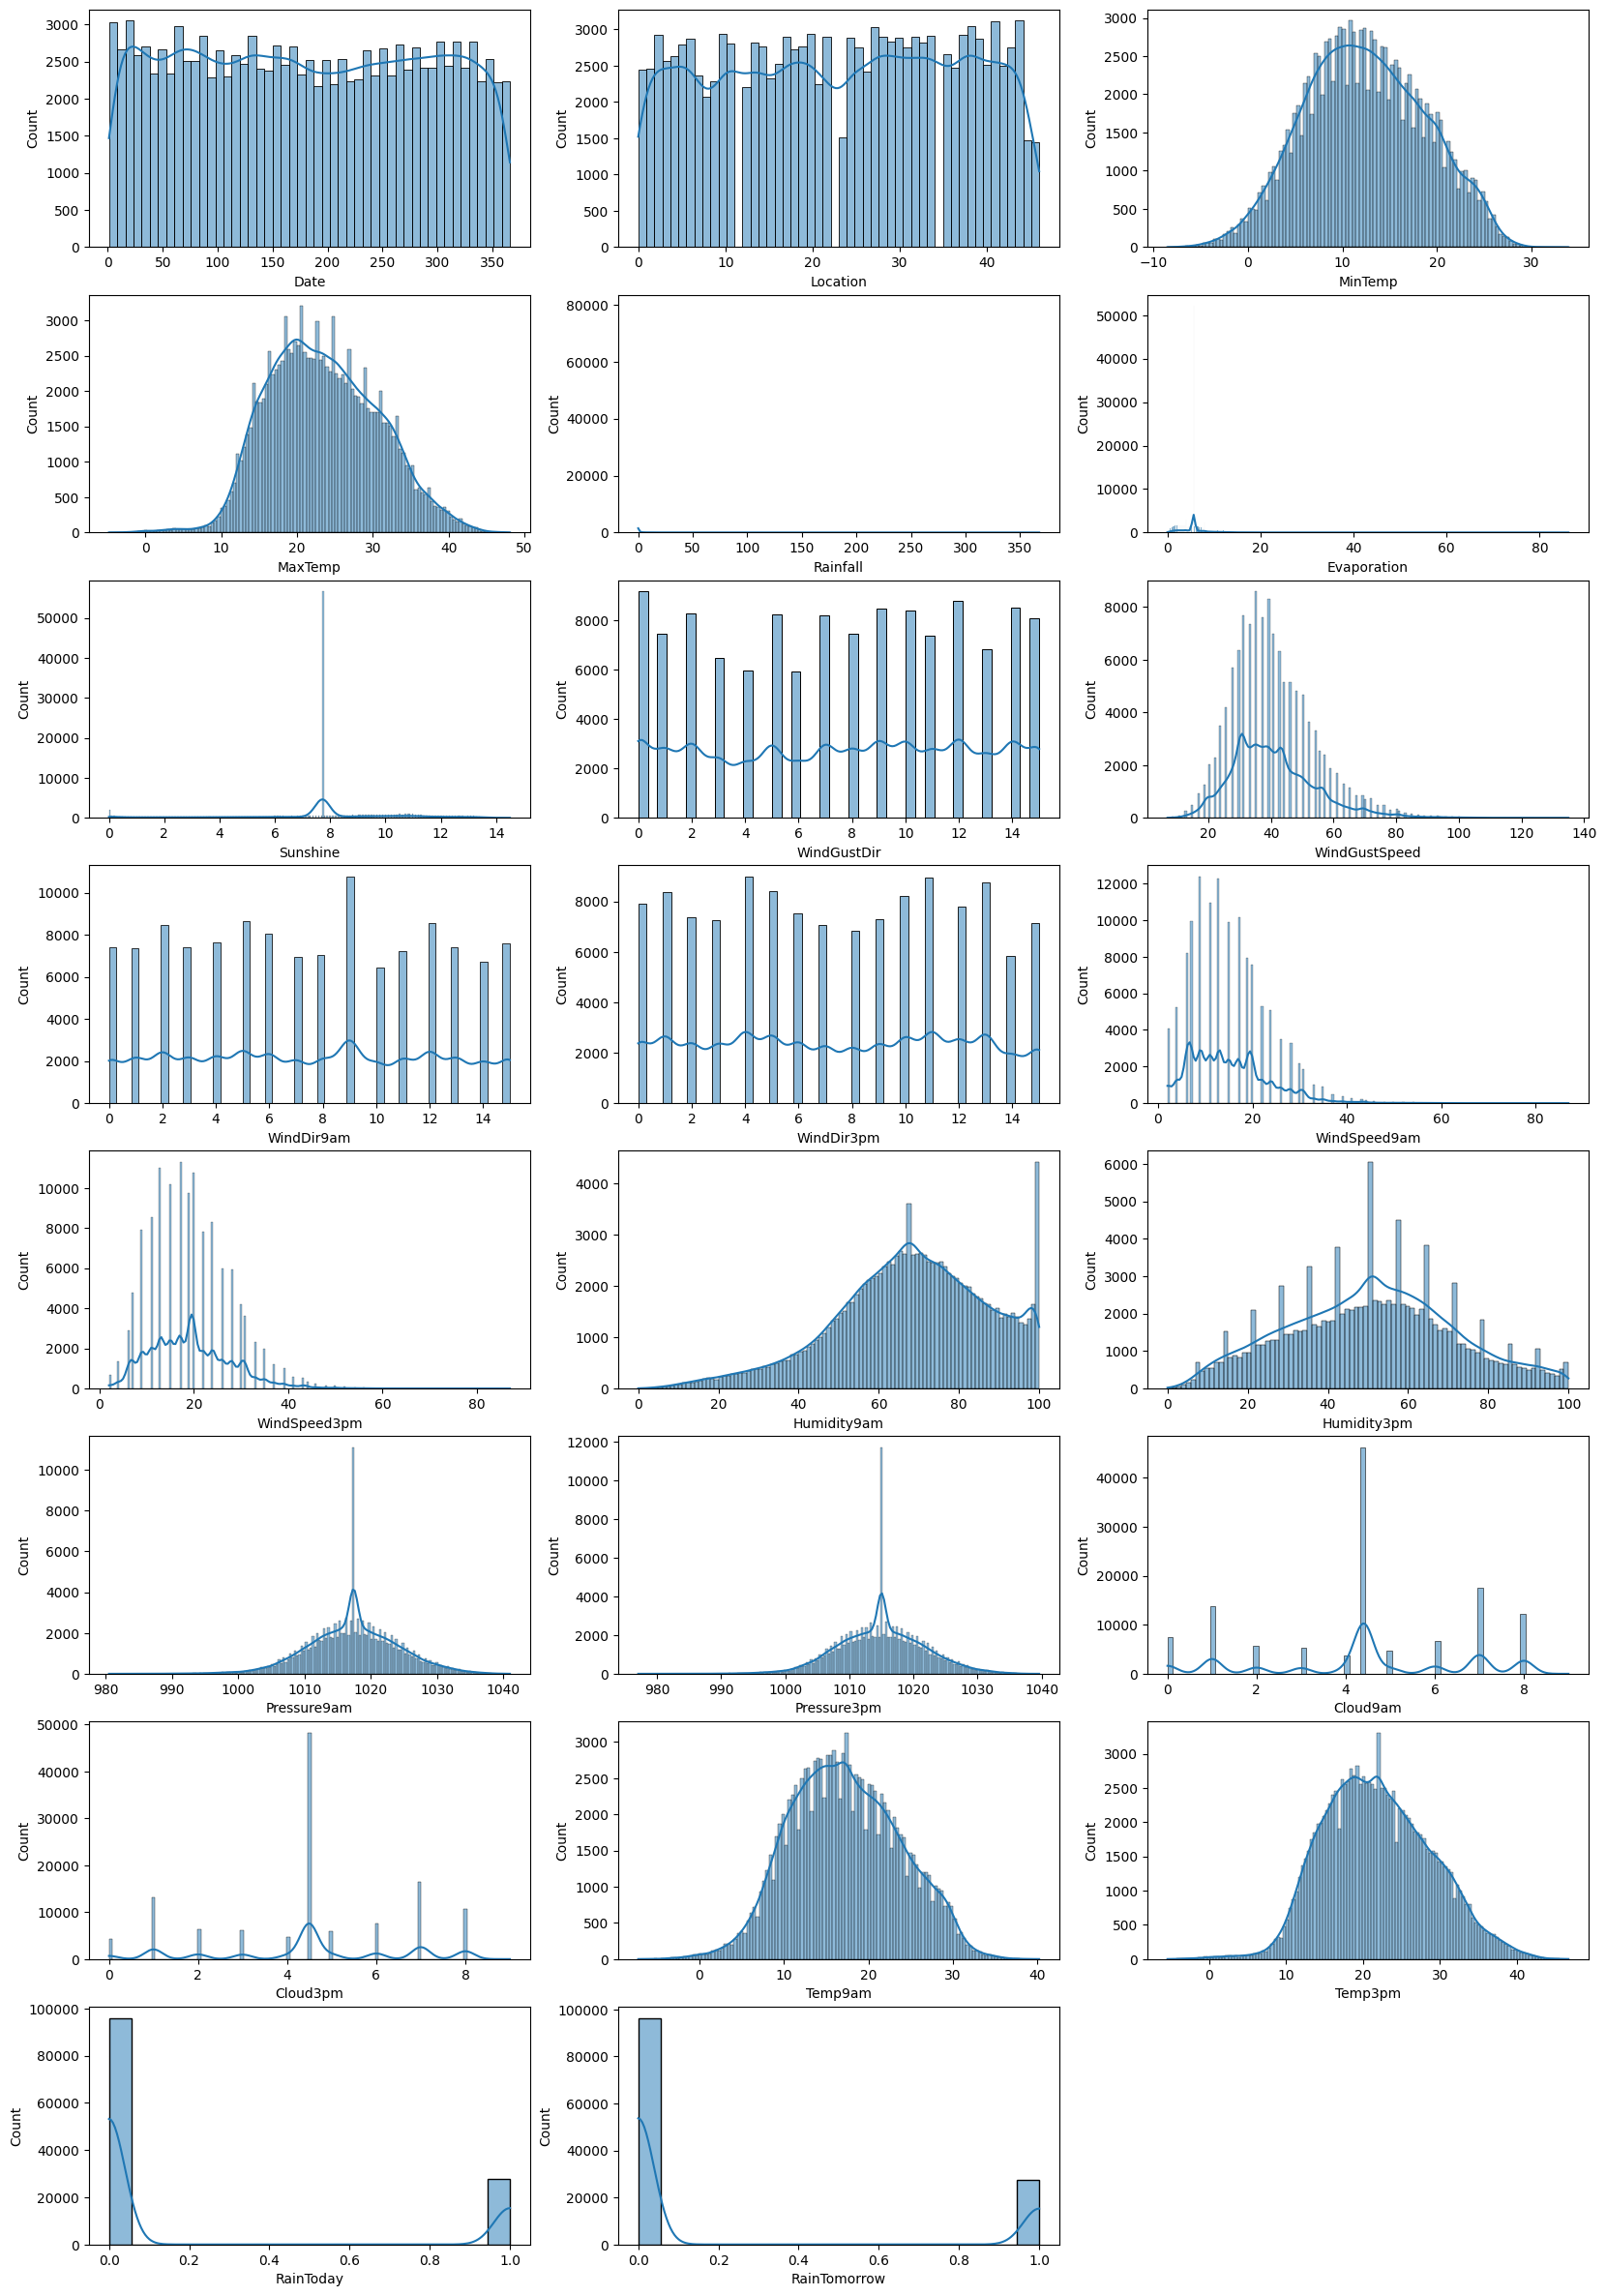

In [4]:
fig, ax = plt.subplots(figsize=(20, 30))

for index, column in enumerate(df.columns):
	ax = plt.subplot(8, 3, index + 1)
	sns.histplot(df[column], kde = True)


D:\Temp\ipykernel_10716\499612182.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(8, 3, index + 1)


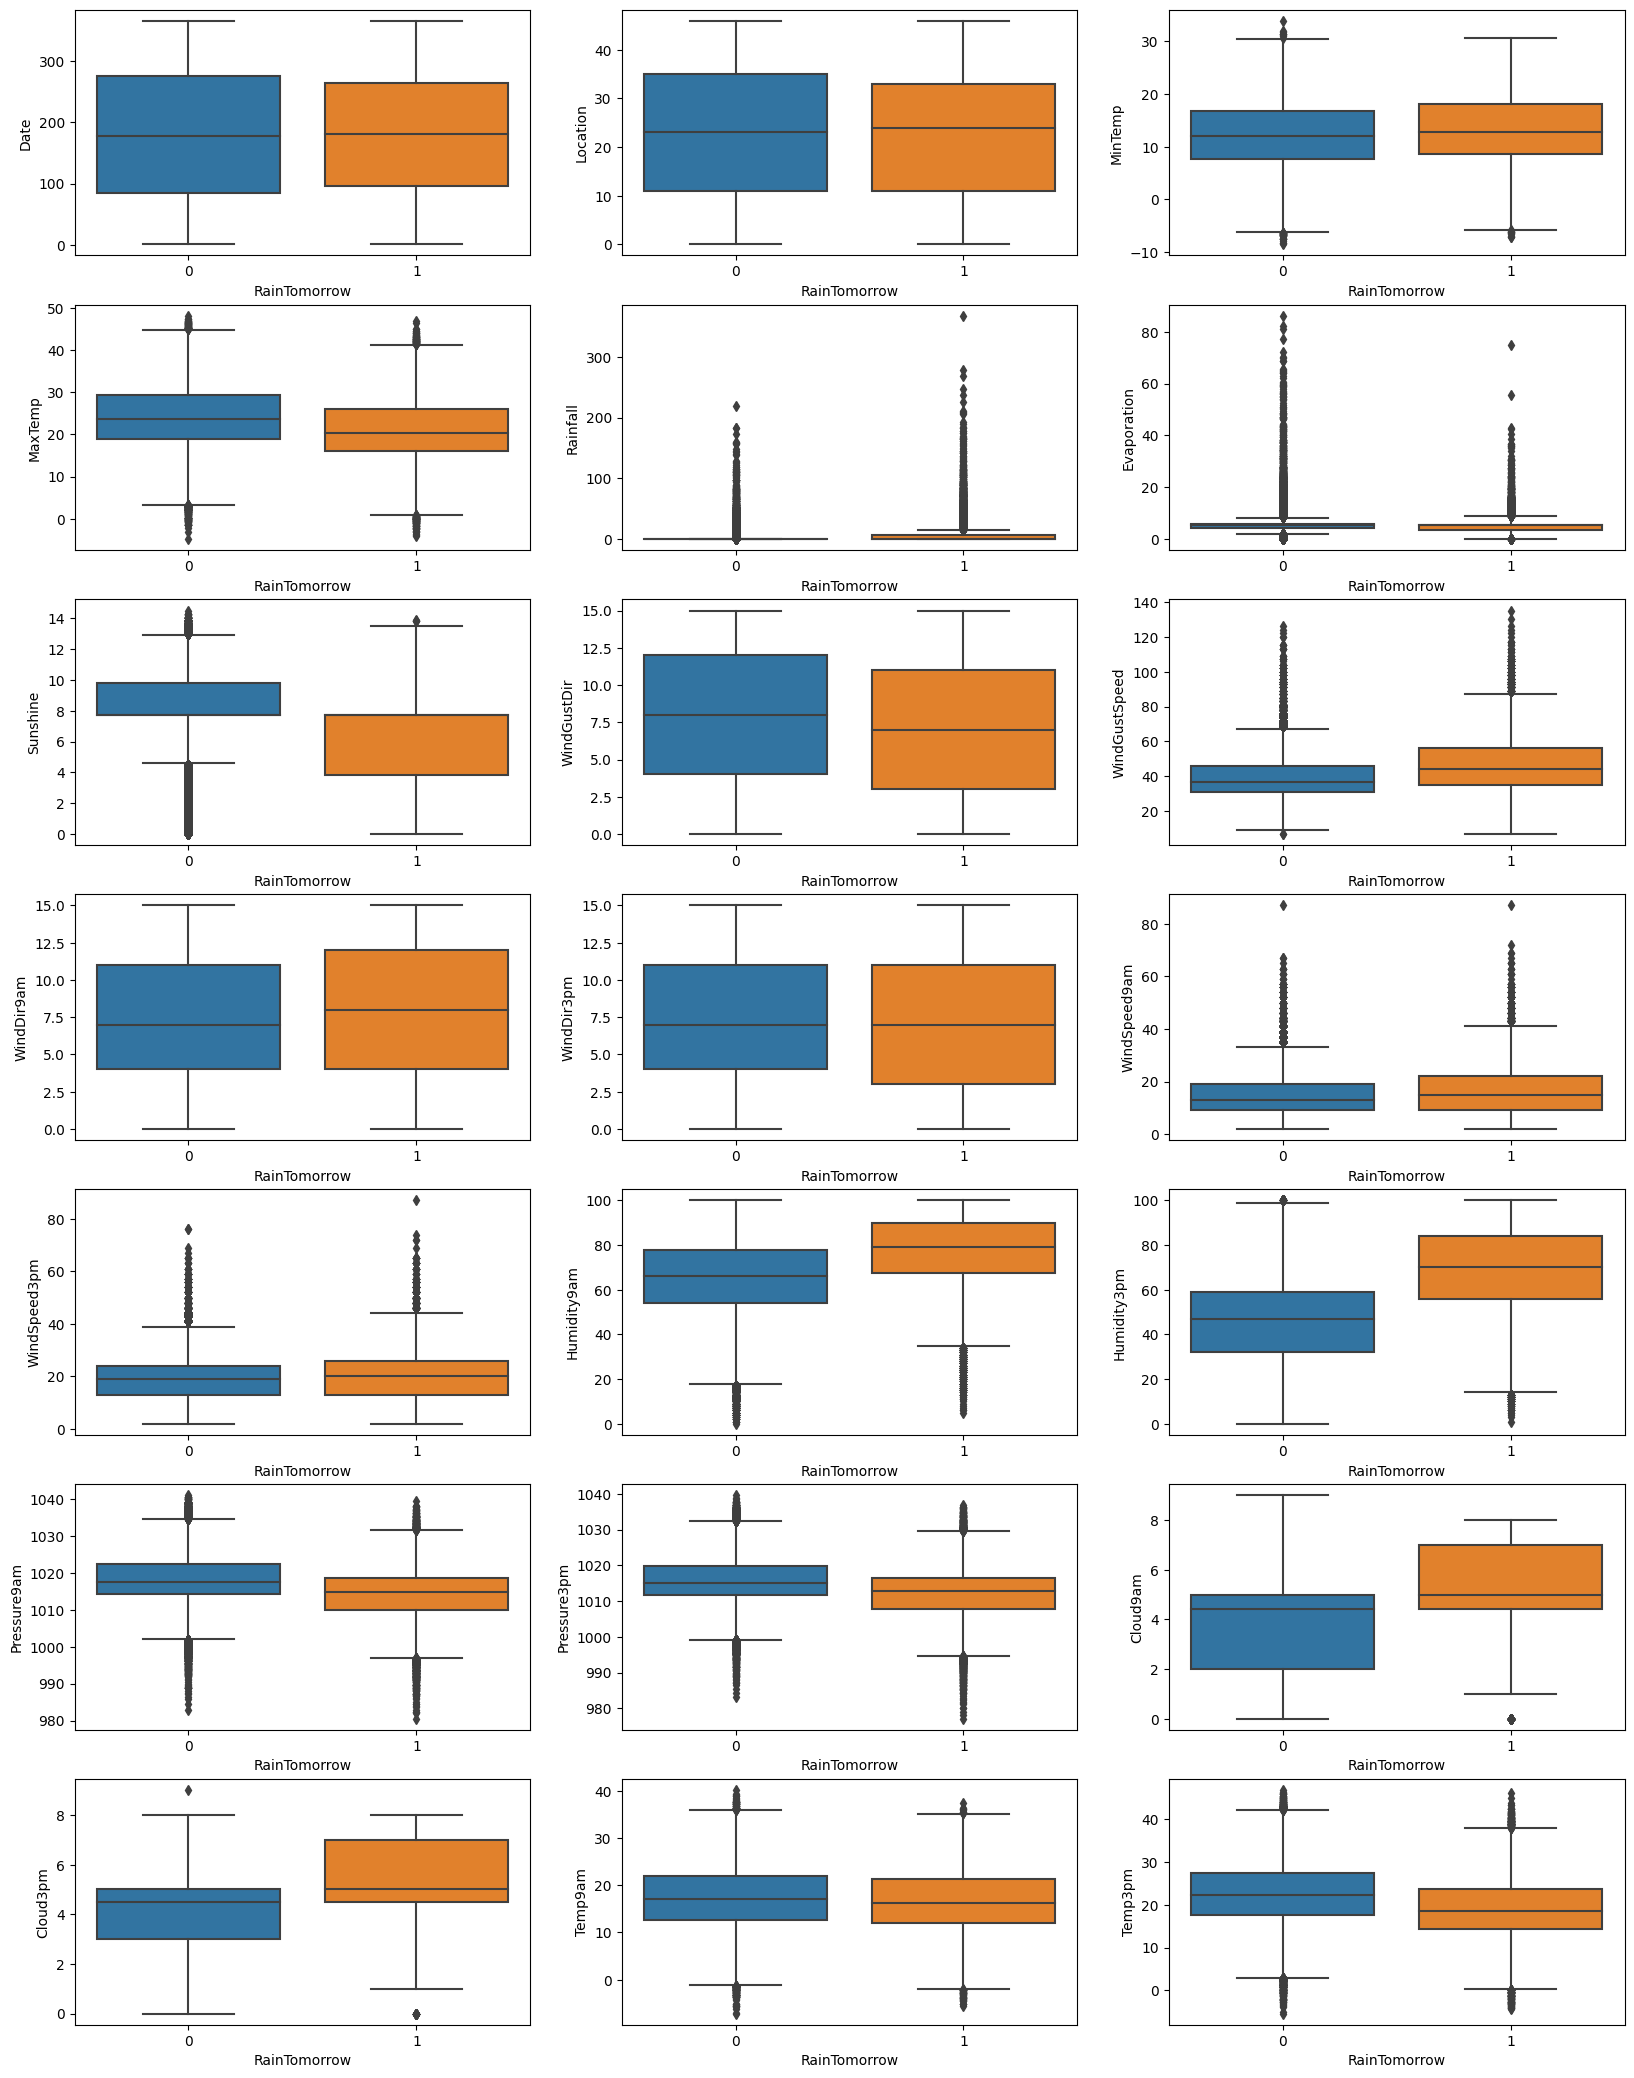

In [5]:
fig, ax = plt.subplots(figsize=(20, 30))

columns = df.columns[0:-2]

for index, column in enumerate(columns):
	ax = plt.subplot(8, 3, index + 1)
	sns.boxplot(x = df['RainTomorrow'], y = df[column])


RainTomorrow     1.000000
Humidity3pm      0.451715
RainToday        0.315867
Cloud3pm         0.304470
Humidity9am      0.272923
Cloud9am         0.259178
Rainfall         0.240838
WindGustSpeed    0.236541
WindSpeed3pm     0.096030
WindSpeed9am     0.093531
MinTemp          0.076628
WindDir9am       0.014373
Date             0.005977
Location        -0.014230
WindDir3pm      -0.017560
Temp9am         -0.036283
WindGustDir     -0.062513
Evaporation     -0.095151
MaxTemp         -0.168455
Temp3pm         -0.200434
Pressure3pm     -0.215577
Pressure9am     -0.235342
Sunshine        -0.338341
Name: RainTomorrow, dtype: float64


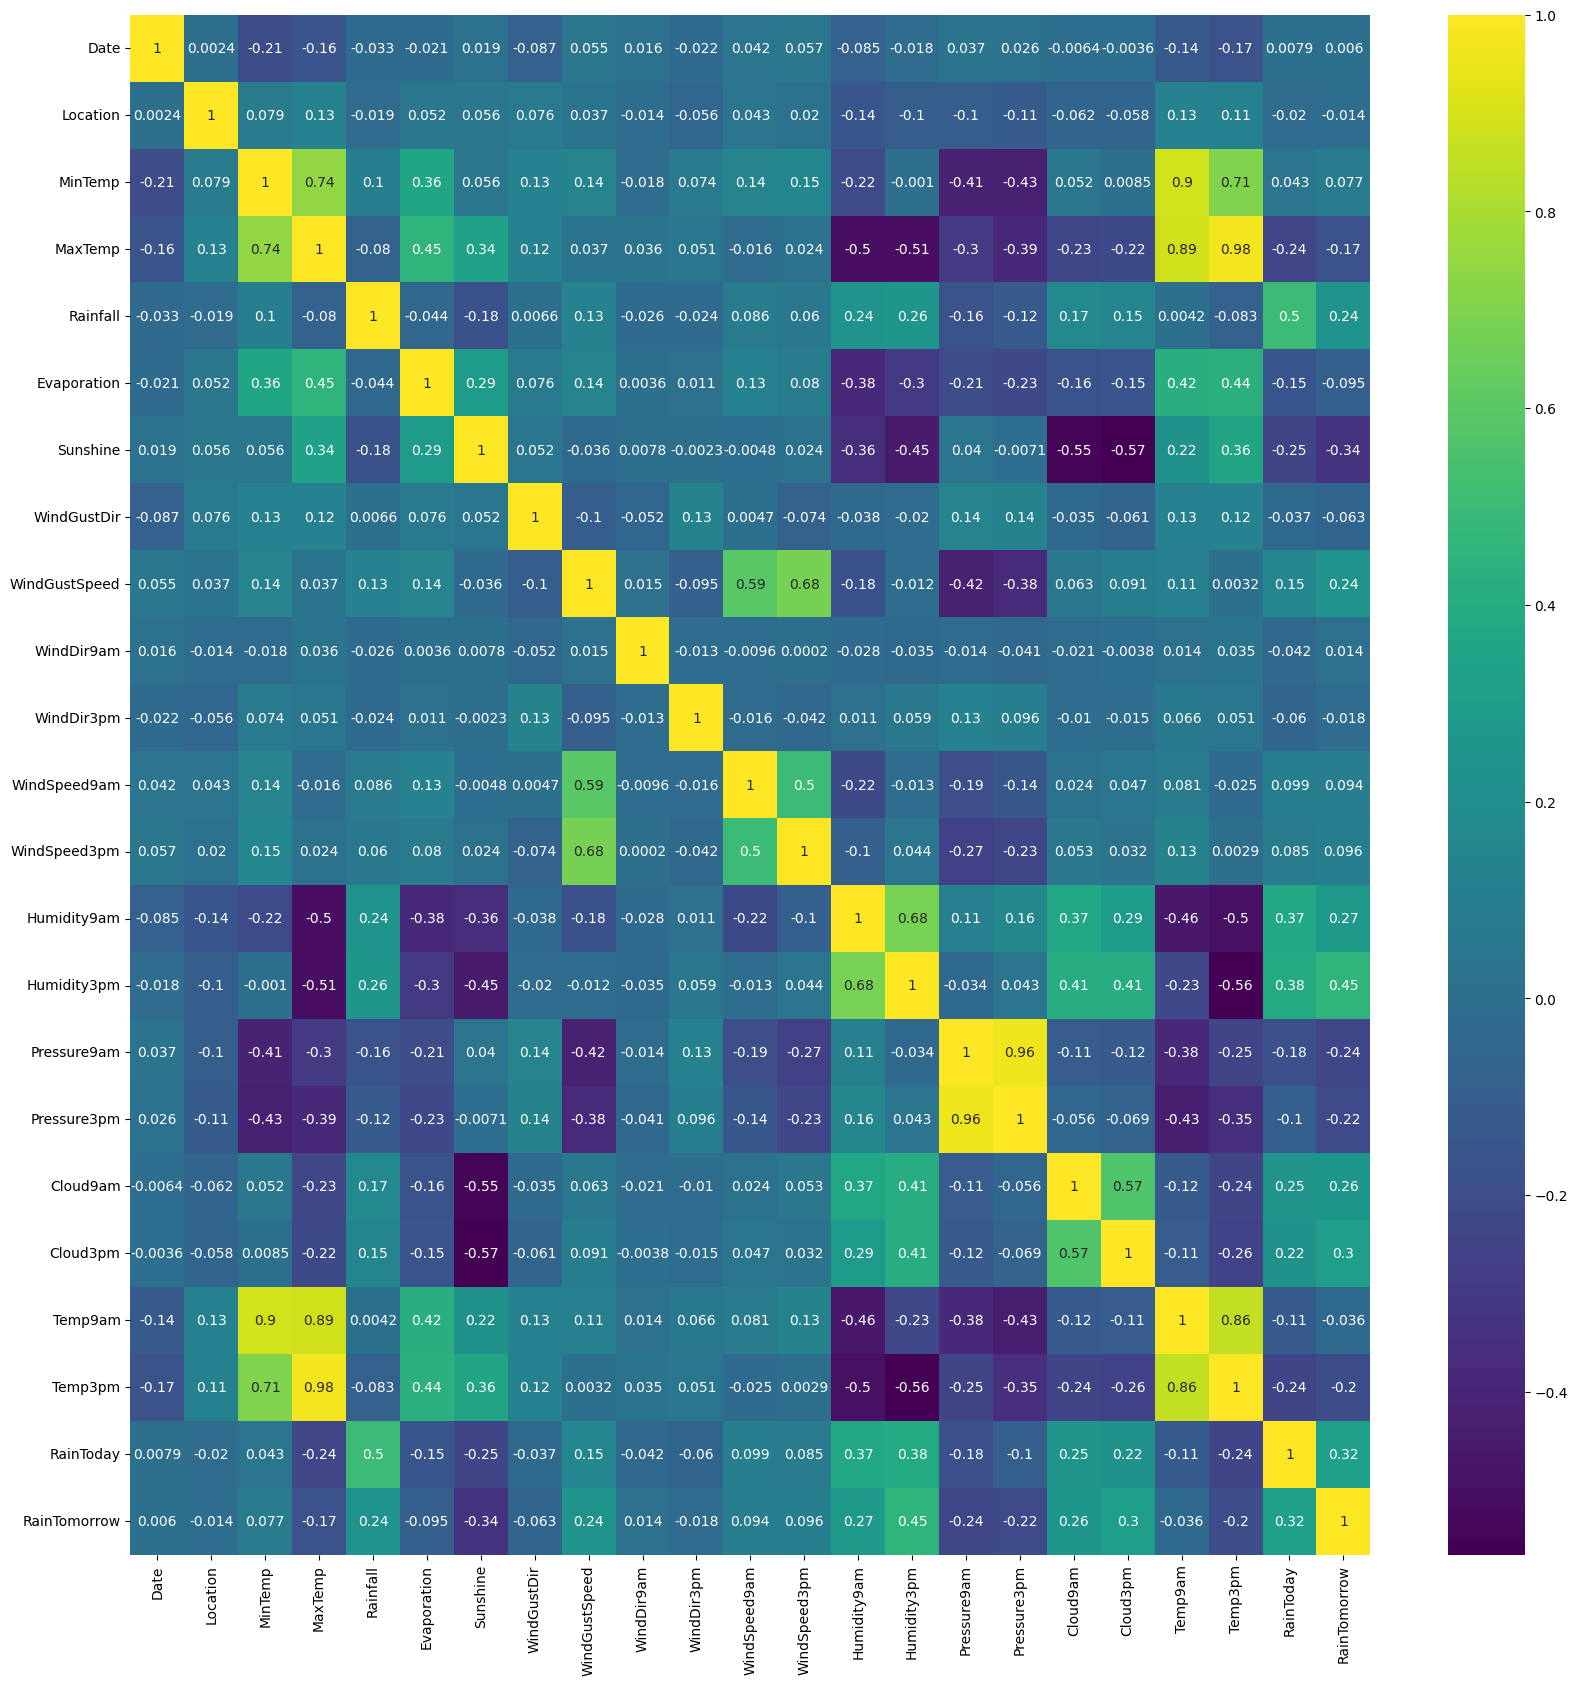

In [6]:
correlation = df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation, annot=True, cmap='viridis')

target_correlation = correlation['RainTomorrow'].sort_values(ascending = False)

print(target_correlation)


In [7]:
target_columns = [target_correlation.index[i] for i, value in filter(lambda item: item[1] > 0, enumerate(target_correlation.values))]

target_columns


['RainTomorrow',
 'Humidity3pm',
 'RainToday',
 'Cloud3pm',
 'Humidity9am',
 'Cloud9am',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed3pm',
 'WindSpeed9am',
 'MinTemp',
 'WindDir9am',
 'Date']

In [8]:
x = df[target_columns]
y = x.pop('RainTomorrow')

x = StandardScaler().fit_transform(x)


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)


In [11]:
k_nearest_neighbors_params = {
	'n_neighbors': range(1, 21)
}

k_nearest_neighbors = KNeighborsClassifier()

k_nearest_neighbors_grid = GridSearchCV(
	k_nearest_neighbors,
	k_nearest_neighbors_params,
	cv = 3,
	n_jobs = 10,
	scoring = 'accuracy',
	verbose = 1
).fit(x_train, y_train)

print(f'Best score: {k_nearest_neighbors_grid.best_params_}')
print(f'Best params: {k_nearest_neighbors_grid.best_score_}')

y_pred_knn = k_nearest_neighbors_grid.predict(x_test)

print(f'Accuracy score: {accuracy_score(y_test, y_pred_knn)}')


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best score: {'n_neighbors': 20}
Best params: 0.8420060150405747
Accuracy score: 0.8426991722710813


In [13]:
support_vector_machines_params = {
	'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

support_vector_machines = SVC()

support_vector_machines_grid = GridSearchCV(
	support_vector_machines,
	support_vector_machines_params,
	cv = 2,
	n_jobs = 10,
	scoring = 'accuracy',
	verbose = 1
).fit(x_train, y_train)

print(f'Best score: {support_vector_machines_grid.best_params_}')
print(f'Best params: {support_vector_machines_grid.best_score_}')

y_pred_svm = support_vector_machines_grid.predict(x_test)

print(f'Accuracy score: {accuracy_score(y_test, y_pred_svm)}')


Fitting 2 folds for each of 4 candidates, totalling 8 fits
Best score: {'kernel': 'rbf'}
Best params: 0.8477721971934211
Accuracy score: 0.8476784790481118


In [14]:
support_vector_machines_params = {
	'C': [0.1, 1, 10, 100, 1000], 
	'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
}

support_vector_machines = SVC(kernel = support_vector_machines_grid.best_params_['kernel'])

support_vector_machines_grid = GridSearchCV(
	support_vector_machines,
	support_vector_machines_params,
	cv = 2,
	n_jobs = 10,
	scoring = 'accuracy',
	verbose = 1
).fit(x_train, y_train)

print(f'Best score: {support_vector_machines_grid.best_params_}')
print(f'Best params: {support_vector_machines_grid.best_score_}')

y_pred_svm = support_vector_machines_grid.predict(x_test)

print(f'Accuracy score: {accuracy_score(y_test, y_pred_svm)}')


Fitting 2 folds for each of 25 candidates, totalling 50 fits
Best score: {'C': 1, 'gamma': 0.1}
Best params: 0.8480200901036838
Accuracy score: 0.8483251422659079


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best score: {'max_depth': 7}
Best params: 0.8412515491801132
Accuracy score: 0.8406621831350233


[Text(0.5, 0.875, 'x[0] <= 0.991\ngini = 0.345\nsamples = 92782\nvalue = [72223, 20559]'),
 Text(0.25, 0.625, 'x[0] <= 0.175\ngini = 0.243\nsamples = 77669\nvalue = [66662, 11007]'),
 Text(0.125, 0.375, 'x[6] <= 1.181\ngini = 0.161\nsamples = 52673\nvalue = [48038, 4635]'),
 Text(0.0625, 0.125, 'gini = 0.128\nsamples = 47032\nvalue = [43793, 3239]'),
 Text(0.1875, 0.125, 'gini = 0.372\nsamples = 5641\nvalue = [4245, 1396]'),
 Text(0.375, 0.375, 'x[6] <= 0.621\ngini = 0.38\nsamples = 24996\nvalue = [18624, 6372]'),
 Text(0.3125, 0.125, 'gini = 0.321\nsamples = 19822\nvalue = [15849, 3973]'),
 Text(0.4375, 0.125, 'gini = 0.497\nsamples = 5174\nvalue = [2775, 2399]'),
 Text(0.75, 0.625, 'x[0] <= 1.567\ngini = 0.465\nsamples = 15113\nvalue = [5561, 9552]'),
 Text(0.625, 0.375, 'x[6] <= -0.35\ngini = 0.5\nsamples = 8698\nvalue = [4388, 4310]'),
 Text(0.5625, 0.125, 'gini = 0.453\nsamples = 3361\nvalue = [2197, 1164]'),
 Text(0.6875, 0.125, 'gini = 0.484\nsamples = 5337\nvalue = [2191, 3146]

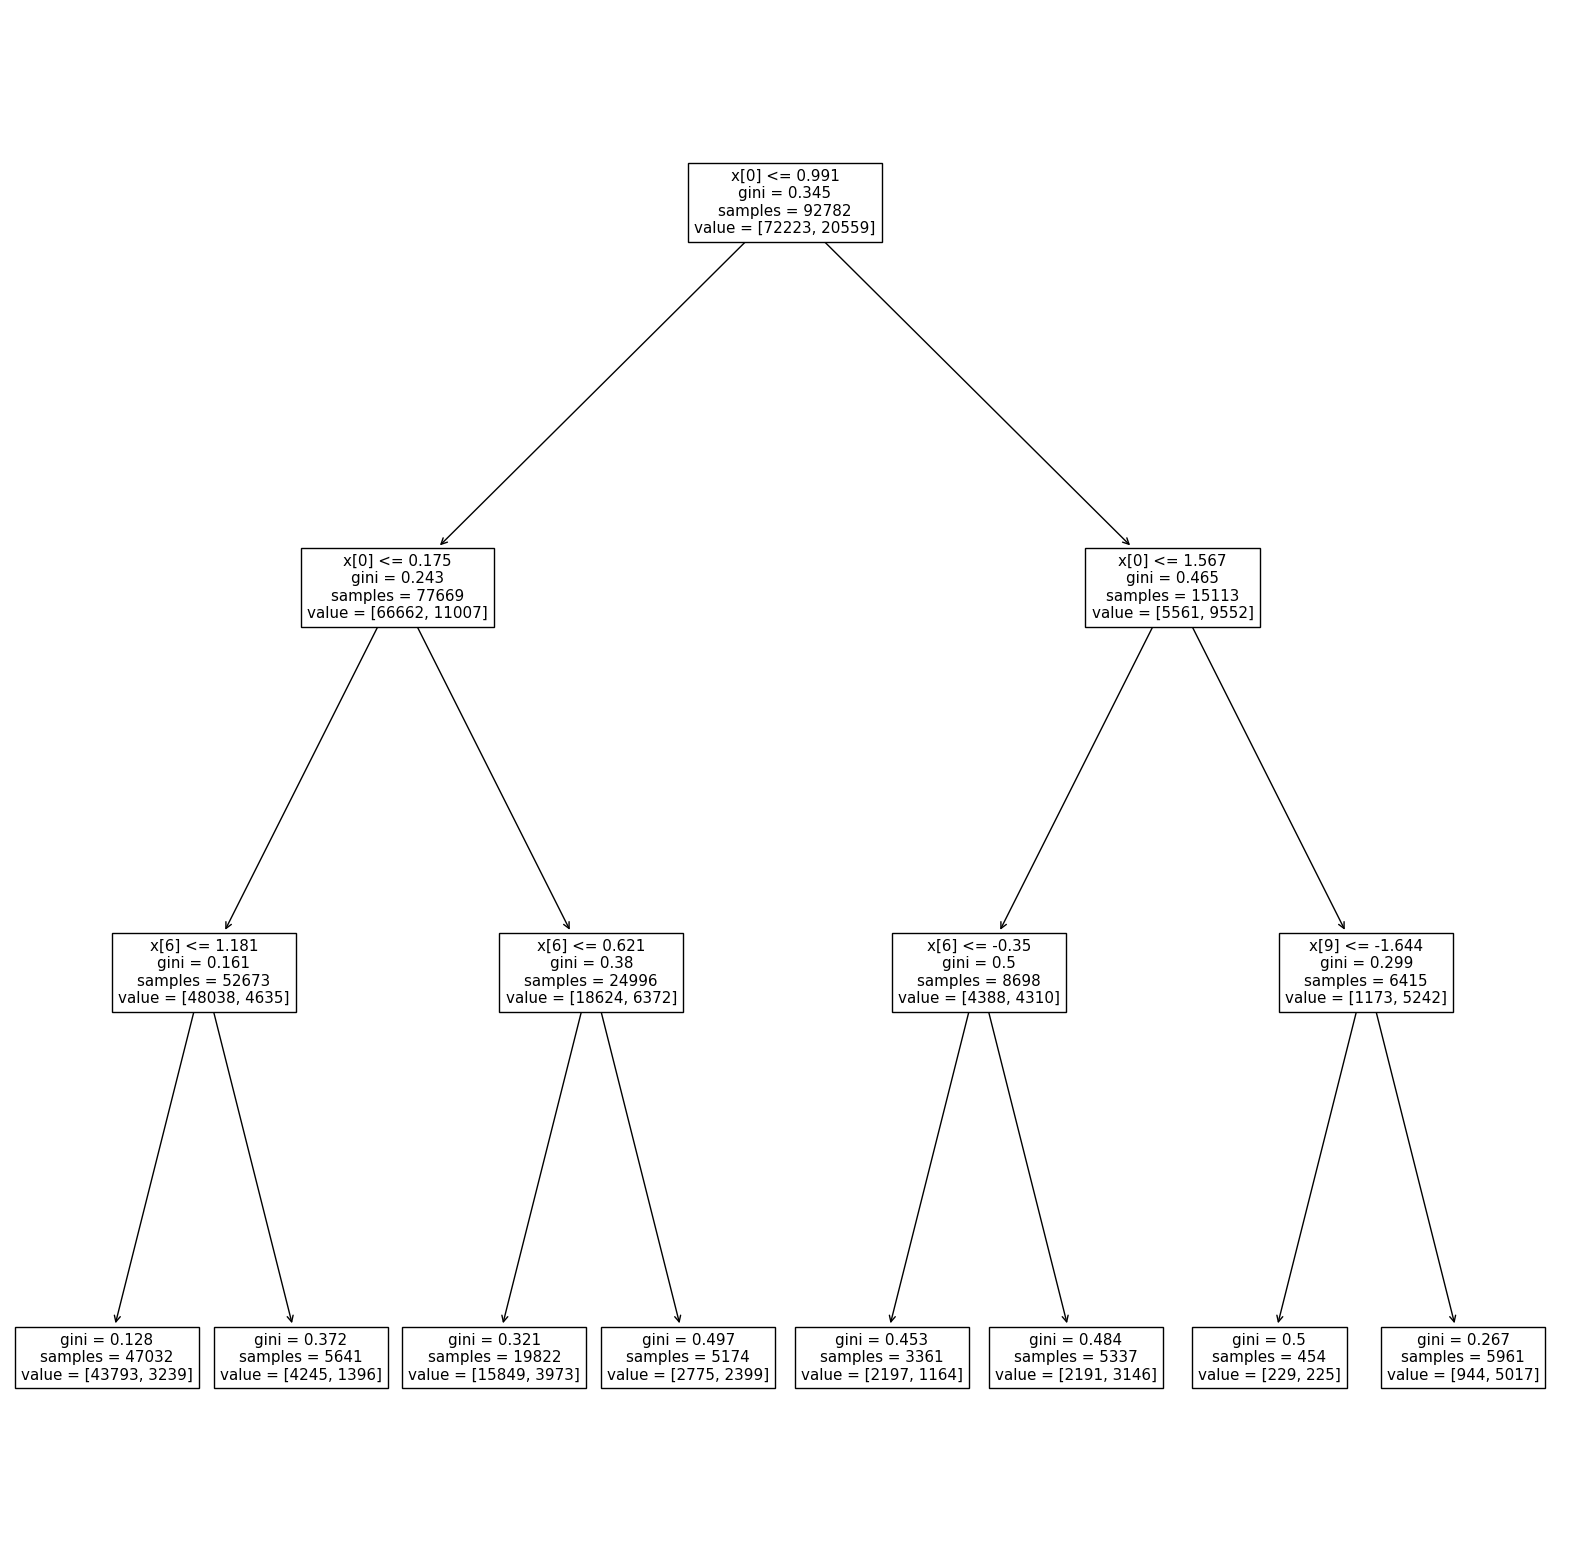

In [19]:
decision_tree_params = {
	'max_depth': list(range(1, 11))
}

decision_tree = DecisionTreeClassifier()

decision_tree_grid = GridSearchCV(
	decision_tree,
	decision_tree_params,
	cv = 3,
	n_jobs = 10,
	scoring = 'accuracy',
	verbose = 1
).fit(x_train, y_train)

print(f'Best score: {decision_tree_grid.best_params_}')
print(f'Best params: {decision_tree_grid.best_score_}')

y_pred_dt = decision_tree_grid.predict(x_test)

print(f'Accuracy score: {accuracy_score(y_test, y_pred_dt)}')

decision_tree_visual = DecisionTreeClassifier(max_depth = 3).fit(x_train, y_train)

plt.figure(figsize=(20, 20))
plot_tree(decision_tree_visual)

In [20]:
random_forest_params = {
	'n_estimators': [10, 20, 50, 100, 200, 500, 1000]
}

random_forest = RandomForestClassifier(max_depth = decision_tree_grid.best_params_['max_depth'])

random_forest_grid = GridSearchCV(
	random_forest,
	random_forest_params,
	cv = 3,
	n_jobs = 10,
	scoring = 'accuracy',
	verbose = 1
).fit(x_train, y_train)

print(f'Best score: {random_forest_grid.best_params_}')
print(f'Best params: {random_forest_grid.best_score_}')

y_pred_rf = random_forest_grid.predict(x_test)

print(f'Accuracy score: {accuracy_score(y_test, y_pred_rf)}')


Fitting 3 folds for each of 7 candidates, totalling 21 fits
Best score: {'n_estimators': 200}
Best params: 0.8451208295251149
Accuracy score: 0.843927832384894


In [21]:
ada_boost_params = {
	'n_estimators': [10, 20, 50, 100, 200, 500, 1000]
}

ada_boost = AdaBoostClassifier()

ada_boost_grid = GridSearchCV(
	ada_boost,
	ada_boost_params,
	cv = 3,
	n_jobs = 10,
	scoring = 'accuracy',
	verbose = 1
).fit(x_train, y_train)

print(f'Best score: {ada_boost_grid.best_params_}')
print(f'Best params: {ada_boost_grid.best_score_}')

y_pred_ab = ada_boost_grid.predict(x_test)

print(f'Accuracy score: {accuracy_score(y_test, y_pred_ab)}')


Fitting 3 folds for each of 7 candidates, totalling 21 fits
Best score: {'n_estimators': 1000}
Best params: 0.8468453065912552
Accuracy score: 0.8459648215209519


In [24]:
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.86      0.96      0.91     24095
           1       0.76      0.43      0.55      6833

    accuracy                           0.84     30928
   macro avg       0.81      0.69      0.73     30928
weighted avg       0.83      0.84      0.83     30928



In [25]:
print(confusion_matrix(y_test, y_pred_rf))


[[23186   909]
 [ 3918  2915]]
